# CO2 Emission Prediction

## Project Overview

This project aims to predict the **CO2 emissions** of different types of cars based on the **volume** of fuel and **weight** of the vehicle using a regression model. By analyzing the relationship between these independent variables and the target variable (CO2 emission), we can estimate CO2 emission levels for various cars.

The dataset consists of information about car names, models, and their respective volume and weight, providing a comprehensive view for building a predictive regression model.

## About the Dataset

This dataset contains the CO2 emissions of different car models. It includes two key independent variables: **volume** and **weight** of the cars, which can be used to predict the **CO2 emission**. This dataset is perfect for practicing regression techniques, specifically linear regression, to predict a continuous variable.

## Data Source

This dataset is available on Kaggle in the following link:
> https://www.kaggle.com/datasets/midhundasl/co2-emission-of-cars-dataset/data

### Dataset Specifications
- **Car**: Name of the car.
- **Model**: Name of the model of the car.
- **Volume**: Volume of fuel (in cubic centimeters).
- **Weight**: Weight of the car (in kilograms).
- **CO2**: CO2 emitted by the car (in grams per kilometer).

## Problem Satement

- **Exploratory Data Analysis**: The objective of EDA is to analyze the data and find the patterns avaliable in data to detect the potential predictors to predict the CO2 emision.
- **Data Cleaning**: Clean the data to remove or handle missing values and outliers, and remove the unnecessary features.

### Load Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import category_encoders as ce

### Settings

In [2]:
# warnings
warnings.filterwarnings("ignore")

# Plot
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "DATA.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path)

In [4]:
# Check 1st 5 observations to get an idea about the data
df.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


### Exploratory Data Analysis(EDA)

In [5]:
# Data Description
print("=" * 60)
print("DATA DECRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DECRIPTION
Number of observations: 36
Number of features: 6


In [6]:
# Feature Description
print("=" * 60)
print("FEATURE DECRIPTION")
print("=" * 60)
print(df.dtypes)
num_cols= [ col for col in df.columns if df[col].dtype != "object"]
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
print("-" * 60)
print(f"Number of numeric features: {len(num_cols)}")
print(num_cols)
print("-" * 60)
print(f"Number of categorical features: {len(cat_cols)}")
print(cat_cols)

FEATURE DECRIPTION
Car            object
Model          object
Volume          int64
Weight          int64
CO2             int64
Unnamed: 5    float64
dtype: object
------------------------------------------------------------
Number of numeric features: 4
['Volume', 'Weight', 'CO2', 'Unnamed: 5']
------------------------------------------------------------
Number of categorical features: 2
['Car', 'Model']


In [7]:
# Missing Value Detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
print(df.isnull().sum())

MISSING VALUE DETECTION
Car            0
Model          0
Volume         0
Weight         0
CO2            0
Unnamed: 5    36
dtype: int64


### Key Findings

- This is a very small dataset containing onle **36** observations.
- Except **Unnamed: 5** none of the features contain any missing or null values. The Unnamed: 5 feature contains missing values for all the observations. It seems that this feature might be wrongly present. So, This feature should be dropped.

In [8]:
# Drop the Unnamed: 5 feature
df.drop("Unnamed: 5", axis= 1, inplace= True)
# Drop from numerica features list also
num_cols.remove("Unnamed: 5")
# Sanity check
print(num_cols)
print(df.isnull().sum())

['Volume', 'Weight', 'CO2']
Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64


In [11]:
# Statistical Description
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


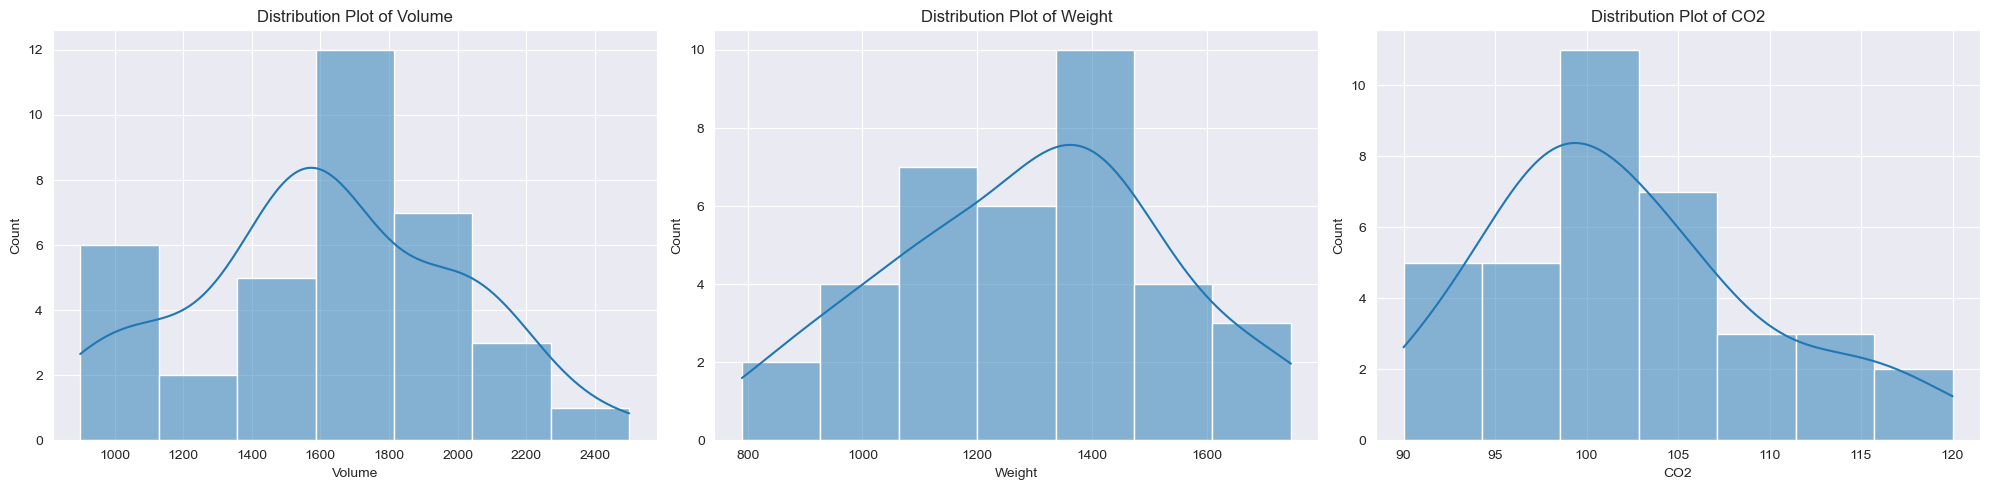

In [12]:
# Distribution in numeric features
fig, axis = plt.subplots(nrows= 1, ncols= 3, figsize= (20, 5))
axis = axis.flatten()
for i,col in enumerate(num_cols):
    sns.histplot(data= df, x= col, kde= True, ax= axis[i])
    axis[i].set_title(f"Distribution Plot of {col}")
plt.tight_layout()
plt.show()

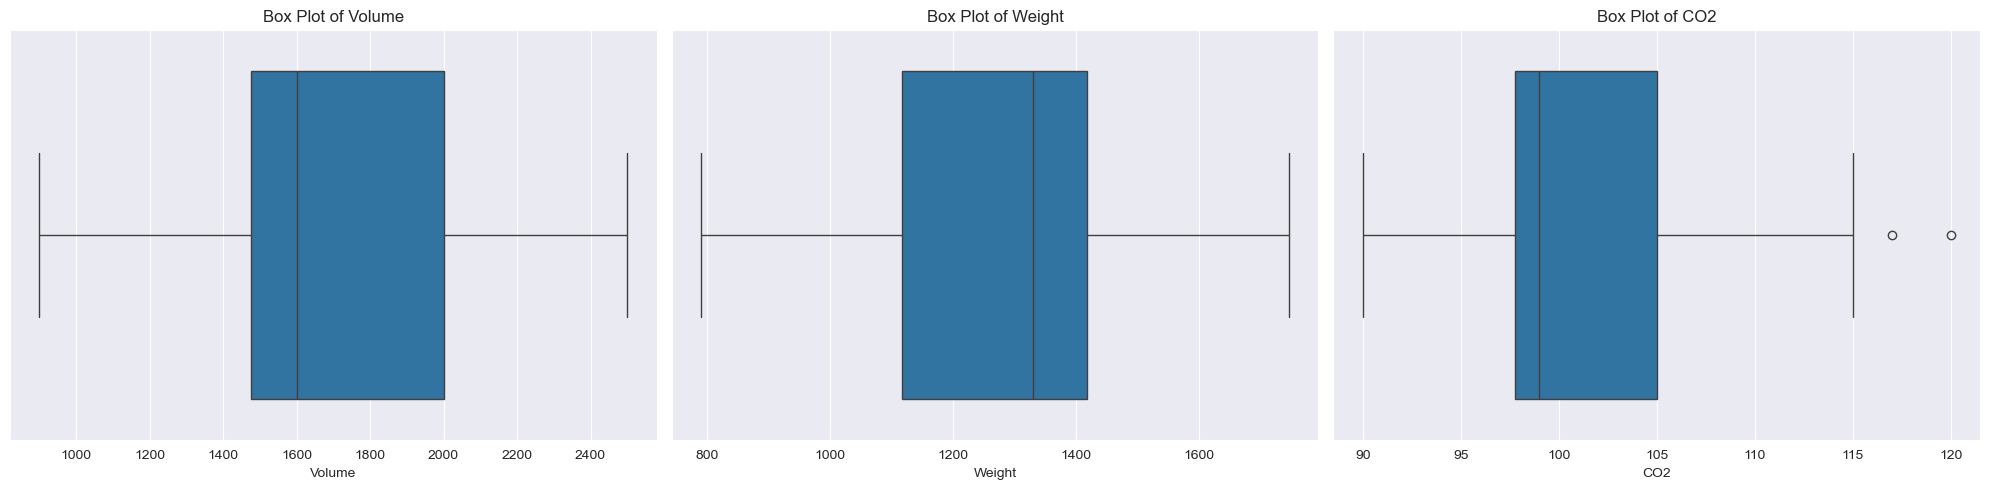

In [10]:
# Outlier Detection in numeric features
fig, axis = plt.subplots(nrows= 1, ncols= 3, figsize= (20, 5))
axis = axis.flatten()
for i,col in enumerate(num_cols):
    sns.boxplot(data= df, x= col, ax= axis[i])
    axis[i].set_title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

### Key Findings

- Only CO2 has a very few outliers.

### Car Analysis(CO2 Emision of Car)

Analyze how CO2 emision varies in car company

CAR EMISION ANALYSIS
           Car         CO2
16       Volvo  108.333333
1          BMW  107.000000
0         Audi  105.666667
8     Mercedes  105.600000
9         Mini  105.000000
15          VW  105.000000
7        Mazda  104.000000
11        Opel  101.666667
13      Suzuki  101.000000
3         Ford  100.000000
6      Hyundai   99.000000
14      Toyota   99.000000
5       Hundai   97.000000
12       Skoda   97.000000
10  Mitsubishi   95.000000
4        Honda   94.000000
2         Fiat   90.000000


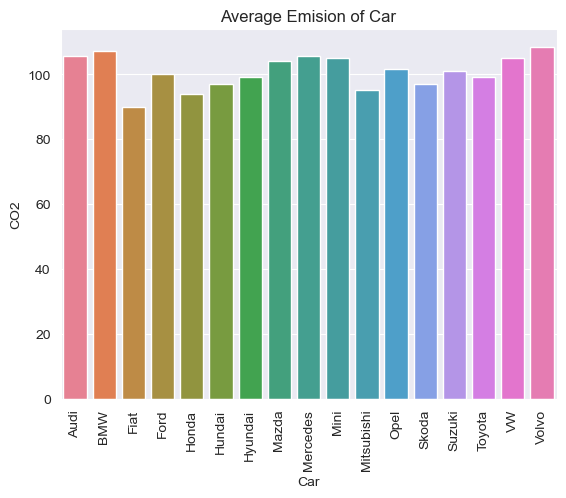

In [28]:
# Calculate average CO2 emision in different car
car_emision = df.groupby("Car")["CO2"].mean().reset_index()
print("=" * 60)
print("CAR EMISION ANALYSIS")
print("=" * 60)
print(car_emision.sort_values("CO2", ascending=False))

# Visualize the emision of cars
sns.barplot(data= car_emision, x= "Car", y= "CO2", hue="Car")
plt.title("Average Emision of Car")
plt.xticks(rotation=90)
plt.show()

### Key Findings

- Volvo has the highest average CO2 emision.

### Car Model Analysis(CO2 Emision of Car model)

Analyze how CO2 emision varies in car models

CAR MODEL EMISION ANALYSIS
         Model    CO2
28         SLK  120.0
33        XC70  117.0
17     E-Class  115.0
8           A6  114.0
3            5  114.0
32         V70  109.0
34      Zafira  109.0
1            2  108.0
31         Up!  105.0
16      Cooper  105.0
20       Focus  105.0
7           A4  104.0
2            3  104.0
11       B-Max  104.0
26       Rapid  104.0
13         CLA  102.0
30       Swift  101.0
6           A1   99.0
27         S60   99.0
25     Octavia   99.0
23    Insignia   99.0
21         I20   99.0
12     C-Class   99.0
10        Aygo   99.0
0            1   99.0
19      Fiesta   98.5
22         I30   97.0
9        Astra   97.0
14      Citigo   95.0
29  Space Star   95.0
24      Mondeo   94.0
15       Civic   94.0
5      A-Class   92.0
18       Fabia   90.0
4          500   90.0


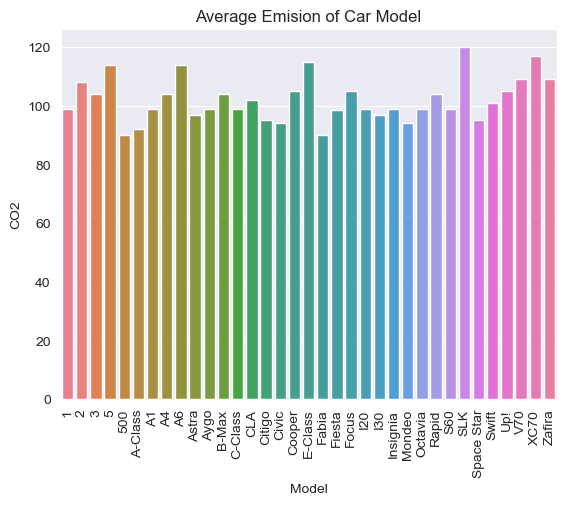

In [30]:
# Calculate average CO2 emision in different car
car_emision = df.groupby("Model")["CO2"].mean().reset_index()
print("=" * 60)
print("CAR MODEL EMISION ANALYSIS")
print("=" * 60)
print(car_emision.sort_values("CO2", ascending=False))

# Visualize the emision of cars
sns.barplot(data= car_emision, x= "Model", y= "CO2", hue="Model")
plt.title("Average Emision of Car Model")
plt.xticks(rotation=90)
plt.show()

### Key Findings

- SLK model of Mercedes has the highest average emision.

### Volume Analysis(CO2 Emision for Volume of Car)

Visualize how CO2 emision is depends by the volume of fuel.

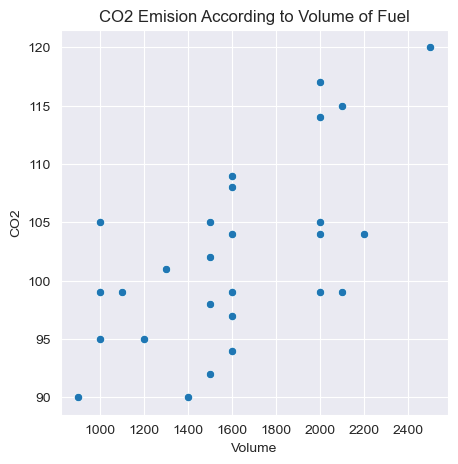

In [33]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data= df, x= "Volume", y= "CO2")
plt.title("CO2 Emision According to Volume of Fuel")
plt.show()

### Key Findings

- CO2 emmision increases with the volume but it might depends on other parameters also not only the volume of fuel.

### Weight Analysis(CO2 Emision with Weight of Car)
Visualize how CO2 emision depends on weight of a car.

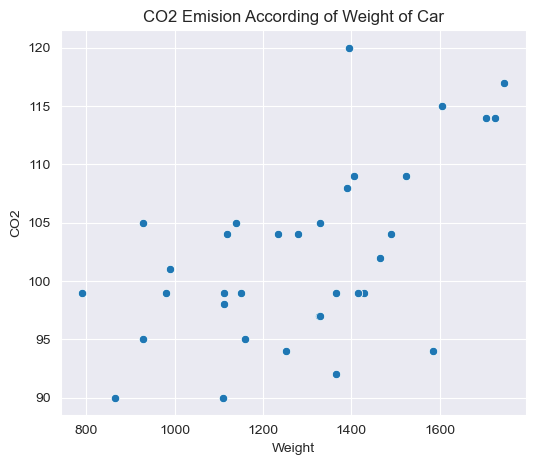

In [34]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data= df, x= "Weight", y= "CO2")
plt.title("CO2 Emision According of Weight of Car")
plt.show()

### Key Findings

- CO2 emision increases with the weight of car not for all cases. It might dedepend of other factors also.

### Correlation Analysis

CORRELATION ANALYSIS
          Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000


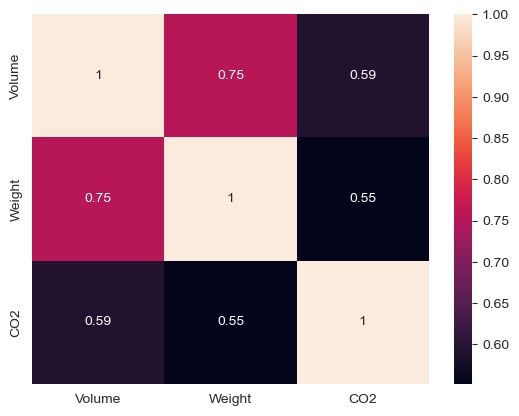

In [42]:
# Find the Correlation of numeric fetures
corr = df[num_cols].corr()
print("=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)
print(corr)

# Visualize correlation with heatmap
sns.heatmap(corr, annot= True)
plt.show()

### Key Findings

- Volume and Weight both have modarate positive correlation with CO2.
- Weight and Volume has highly positive correlation.

### Feature Encoding

Encode the categorical features with category encoder

In [51]:
# Initialize Category Encoder
encoder = ce.TargetEncoder(cols= ["Car", "Model"])
# Encode
df_encoded = encoder.fit_transform(df, df["CO2"])

In [52]:
# Sanity check
df_encoded.head()

,Car,Model,Volume,Weight,CO2
0,101.633838,101.633838,1000,790,99
1,101.113404,101.113404,1200,1160,95
2,101.183204,101.113404,1000,929,95
3,100.462862,100.462862,900,865,90
4,102.414489,102.414489,1500,1140,105


In [54]:
df_encoded.corr()

,Car,Model,Volume,Weight,CO2
Car,1.000000,0.614656,0.554621,0.593635,0.613942
Model,0.614656,1.000000,0.596170,0.553372,0.999823
Volume,0.554621,0.596170,1.000000,0.753537,0.592082
Weight,0.593635,0.553372,0.753537,1.000000,0.552150
CO2,0.613942,0.999823,0.592082,0.552150,1.000000


In [53]:
# Save the encoded data
encode_path = os.path.join(data_path, "DATA_encoded.csv")
df_encoded.to_csv(encode_path, index= False)

In [55]:
# Remove categorical features
df_removed = df.drop(["Car", "Model"], axis= 1)

In [57]:
# Save the removed data
remove_path = os.path.join(data_path, "DATA_cleaned.csv")
df_removed.to_csv(remove_path, index= False)